In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

/Users/boecking/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# VARMAX

In [2]:
warnings.filterwarnings("ignore")
def fit_modelsVARMAX(data,t_train=500,horizon=100,pds = [(1,0),(0,1),(1,1),(2,1),(2,3),(0,5)]):
    best = [None,None,np.infty]
    for param in pds:
        mse = np.infty
        try:
            model = sm.tsa.VARMAX(data[:t_train-horizon],order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = model.fit(disp=False)
            #np.isnan(results.aic)
            #print('VARMAX{} - AIC:{}'.format(param, results.aic))
            mse = np.sum((results.forecast(horizon)-data[t_train-horizon:t_train])**2,1).mean()
            print 'VARMAX{} mse: {}'.format(param,mse)
            if mse<best[2]:
                model = sm.tsa.VARMAX(data[:t_train],order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
                results = model.fit(disp=False)
                best = [results,param,mse]
        except:
            print 'error {}'.format(param)
            continue
    #fit final model
    #param = best[0]
    #model = sm.tsa.VARMAX(data[:t_train],order =(param),
    #              enforce_stationarity=False,
    #             enforce_invertibility=False)
    #results = model.fit(disp=False)
    #return [results,param,best[1]]
    return best

data1.npy
VARMAX(0, 1) mse: 654225.175876
VARMAX(0, 2) mse: 650940.232675
VARMAX(0, 3) mse: 646492.150067
error (1, 0)
error (1, 1)
error (1, 2)
error (1, 3)
VARMAX(2, 0) mse: 0.00764372725852
error (2, 0)
VARMAX(2, 1) mse: 0.00785981601093
error (2, 1)
VARMAX(2, 2) mse: 0.00863432182904
error (2, 2)
VARMAX(2, 3) mse: 0.008022763751
error (2, 3)
VARMAX(3, 0) mse: 0.00781989722433
VARMAX(3, 1) mse: 0.0078792096441
VARMAX(3, 2) mse: 0.00804658574371
VARMAX(3, 3) mse: 0.00837895074082
best params: (3, 0)


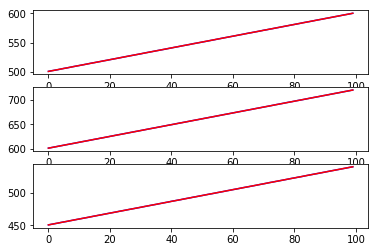

data2.npy
VARMAX(0, 1) mse: 0.293555054976
VARMAX(0, 2) mse: 0.22450126116
VARMAX(0, 3) mse: 0.260749228593
error (1, 0)
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(2, 0) mse: nan
VARMAX(2, 1) mse: inf
error (2, 2)
error (2, 3)
VARMAX(3, 0) mse: 0.0816903510927
error (3, 0)
error (3, 1)
VARMAX(3, 2) mse: 0.0823765104577
error (3, 2)
error (3, 3)
best params: (0, 2)


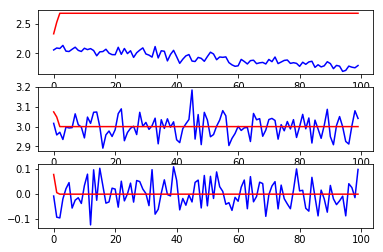

data3.npy
VARMAX(0, 1) mse: 6.45143169728
VARMAX(0, 2) mse: 6.39967842379
VARMAX(0, 3) mse: 6.40150182664
VARMAX(1, 0) mse: 0.0275267741211
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(2, 0) mse: 0.0138896865661
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
VARMAX(3, 0) mse: 0.0126948692383
error (3, 1)
error (3, 2)
VARMAX(3, 3) mse: 3.3891726119e+11
best params: (3, 0)


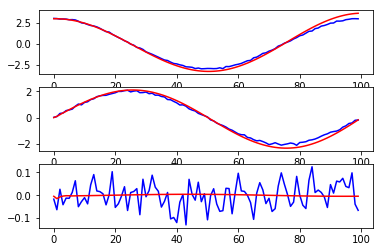

data4.npy
VARMAX(0, 1) mse: 8.47325453162
VARMAX(0, 2) mse: 8.47561798842
VARMAX(0, 3) mse: 8.48292772724
VARMAX(1, 0) mse: 0.180033432151
error (1, 1)
VARMAX(1, 2) mse: inf
VARMAX(1, 3) mse: 5.75158227808e+275
VARMAX(2, 0) mse: 0.0121308242706
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
VARMAX(3, 0) mse: 0.0108918565394
VARMAX(3, 1) mse: nan
VARMAX(3, 2) mse: 0.0107707023596
error (3, 3)
best params: (3, 2)


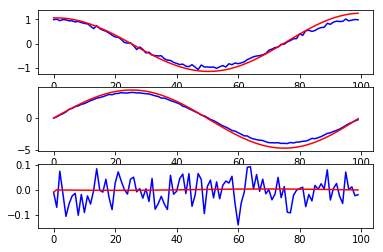

data5.npy
VARMAX(0, 1) mse: 1.01265139519
VARMAX(0, 2) mse: 1.01330207989
VARMAX(0, 3) mse: 1.01331781648
VARMAX(1, 0) mse: 1.03896677169
VARMAX(1, 1) mse: 1.03719056054
VARMAX(1, 2) mse: 1.01148141392
VARMAX(1, 3) mse: 0.997468356087
VARMAX(2, 0) mse: 1.03257609748
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: 0.983943095165
VARMAX(3, 0) mse: 0.950971851084
VARMAX(3, 1) mse: 0.942709422475
error (3, 2)
error (3, 3)
best params: (3, 1)


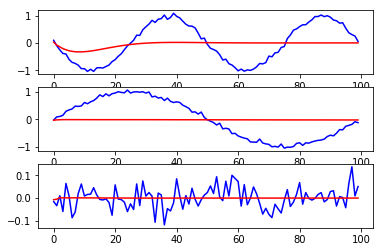

data6.npy
VARMAX(0, 1) mse: 2.5198200553
VARMAX(0, 2) mse: 2.52026033727
VARMAX(0, 3) mse: 2.52108308345
VARMAX(1, 0) mse: 2.64015308284
VARMAX(1, 1) mse: 2.61839394048
VARMAX(1, 2) mse: 2.63953694463
VARMAX(1, 3) mse: 2.55356461203
VARMAX(2, 0) mse: 2.43154870897
error (2, 1)
error (2, 2)
error (2, 3)
VARMAX(3, 0) mse: 2.03677505796e+105
VARMAX(3, 1) mse: 0.501412236883
VARMAX(3, 2) mse: 5.1447689233e+89
error (3, 3)
best params: (3, 1)


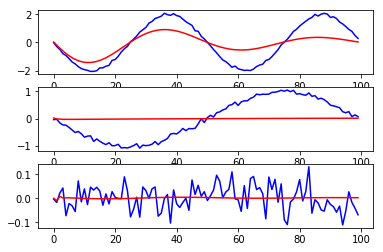

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    [results,params,mse] = fit_modelsVARMAX(data,horizon=horizon,t_train=t_train,pds=pds)
    print 'best params: {}'.format(params)
    tmpdata = data[t_train:t_train+horizon]
    preds = results.forecast(100)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(preds[:,i],color='r')
    plt.show()

# ARIMA

In [4]:
from pyramid.arima import auto_arima
def fit_modelsARIMA(data,t_train=500,start_p=0, start_q=0, max_p=4, max_q=4,max_d=3):
    stepwise_fit0 = auto_arima(data[:t_train,0], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                          start_P=1, seasonal=False, d=None, D=None, trace=False,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)
    stepwise_fit1 = auto_arima(data[:t_train,1], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                      start_P=1, seasonal=False, d=None, D=None, trace=False,
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True)
    stepwise_fit2 = auto_arima(data[:t_train,2], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                  start_P=1, seasonal=False, d=None, D=None, trace=False,
                  error_action='ignore',  # don't want to know if an order does not work
                  suppress_warnings=True,  # don't want convergence warnings
                  stepwise=True)
    return [stepwise_fit0,stepwise_fit1,stepwise_fit2]


from pyramid.arima import auto_arima
def fit_modelsARIMASeasonal(data,t_train=500,start_p=0, start_q=0, max_p=4, max_q=4,max_d=3):
    stepwise_fit0 = auto_arima(data[:t_train,0], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                          start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)
    stepwise_fit1 = auto_arima(data[:t_train,1], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                      start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True)
    stepwise_fit2 = auto_arima(data[:t_train,2], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                  start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                  error_action='ignore',  # don't want to know if an order does not work
                  suppress_warnings=True,  # don't want convergence warnings
                  stepwise=True)
    return [stepwise_fit0,stepwise_fit1,stepwise_fit2]

data1.npy


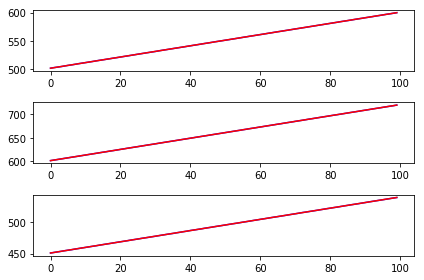

data2.npy


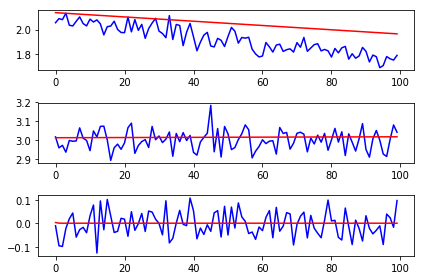

data3.npy


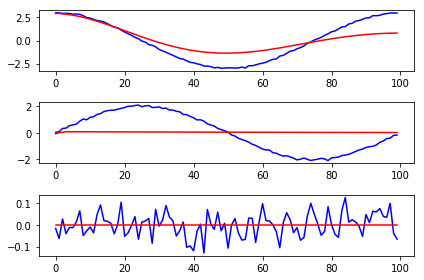

data4.npy


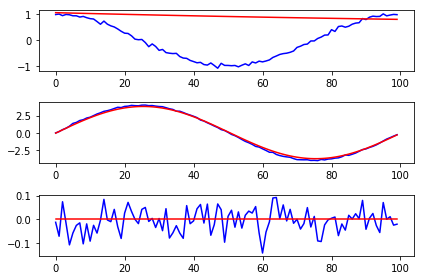

data5.npy


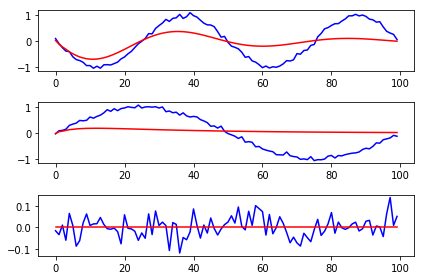

data6.npy


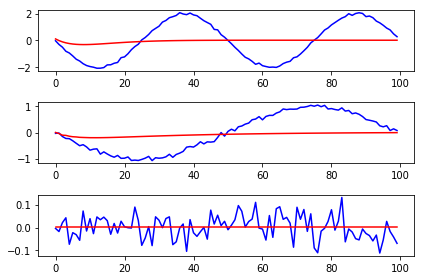

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    stepwise_fits= fit_modelsARIMA(data,t_train=t_train)
    tmpdata = data[t_train:t_train+horizon]
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(stepwise_fits[i].predict(n_periods=horizon),color='r')
    plt.tight_layout()
    plt.show()

data1.npy


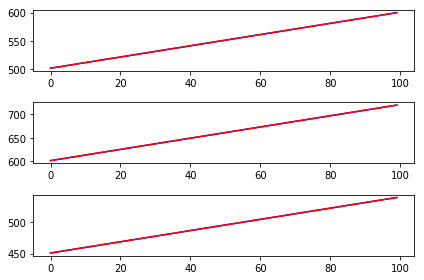

data2.npy


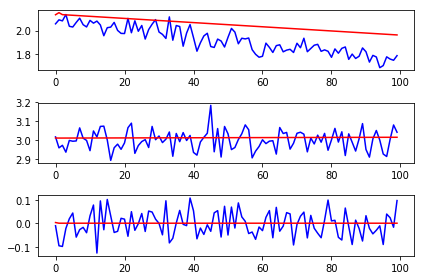

data3.npy


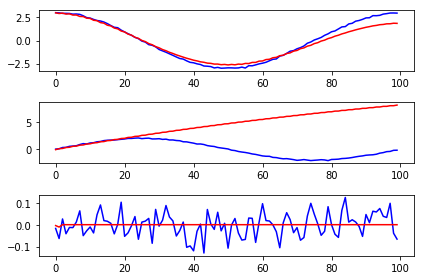

data4.npy


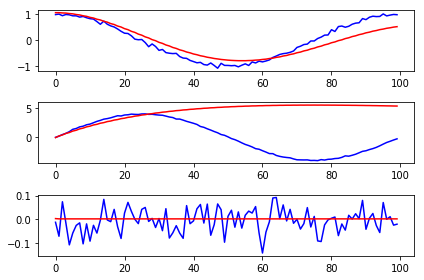

data5.npy


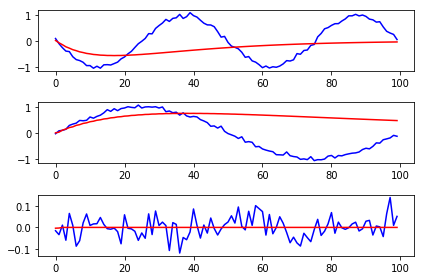

data6.npy


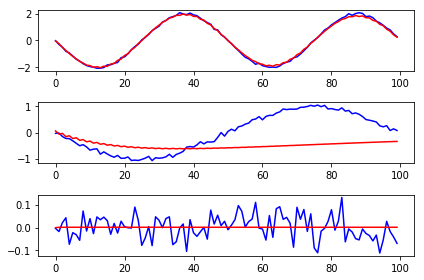

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    stepwise_fits= fit_modelsARIMASeasonal(data,t_train=t_train)
    tmpdata = data[t_train:t_train+horizon]
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(stepwise_fits[i].predict(n_periods=horizon),color='r')
    plt.tight_layout()
    plt.show()

# Dynamic Factor Models 

In [7]:
# Dynamic Factor Models
warnings.filterwarnings("ignore")
def fit_modelsDFM(data,t_train=500,horizon=100,factors = [(1,0),(0,1),(1,1),(2,1),(2,3),(0,5)]):
    best = [None,np.infty]
    for param in factors:
        mse = np.infty
        try:
            #error_cov_type : {‘scalar’, ‘diagonal’, ‘unstructured’}
            model = sm.tsa.DynamicFactor(data[:t_train-horizon],k_factors=param[0], factor_order=param[1],
                                  enforce_stationarity=False,
                                 error_cov_type='diagonal')
            results = model.fit(disp=False)
            #np.isnan(results.aic)
            #print('VARMAX{} - AIC:{}'.format(param, results.aic))
            mse = np.sum((results.forecast(horizon)-data[t_train-horizon:t_train])**2,1).mean()
            print 'VARMAX{} mse: {}'.format(param,mse)
            if mse<best[1]:
                best = [param,mse]
        except:
            print 'error {}'.format(param)
            continue
    #fit final model
    param = best[0]
    model = sm.tsa.DynamicFactor(data[:t_train],k_factors=param[0], factor_order=param[1],
                  enforce_stationarity=False,
                 error_cov_type='diagonal')
    results = model.fit(disp=False)
    return [results,param,best[1]]

data1.npy
VARMAX(0, 1) mse: 654225.175876
VARMAX(0, 2) mse: 650940.232675
VARMAX(0, 3) mse: 646492.150067
VARMAX(0, 4) mse: 642817.211201
error (1, 0)
error (1, 1)
error (1, 2)
error (1, 3)
error (1, 4)
VARMAX(2, 0) mse: 0.00764372725852
error (2, 0)
VARMAX(2, 1) mse: 0.00785981601093
error (2, 1)
VARMAX(2, 2) mse: 0.00863432182904
error (2, 2)
VARMAX(2, 3) mse: 0.008022763751
error (2, 3)
VARMAX(2, 4) mse: 3.2476808544
error (2, 4)
VARMAX(3, 0) mse: 0.00781989722433
VARMAX(3, 1) mse: 0.0078792096441
VARMAX(3, 2) mse: 0.00804658574371
VARMAX(3, 3) mse: 0.00837895074082
VARMAX(3, 4) mse: 0.00827853288286
VARMAX(4, 0) mse: 0.00812882083694
VARMAX(4, 1) mse: 0.00814976204749
VARMAX(4, 2) mse: 0.00820492622488
VARMAX(4, 3) mse: 0.00827679149847
VARMAX(4, 4) mse: 0.00842163386735
best params: (3, 0)


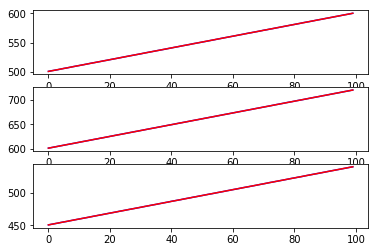

data2.npy
VARMAX(0, 1) mse: 0.293555054976
VARMAX(0, 2) mse: 0.22450126116
VARMAX(0, 3) mse: 0.260749228593
VARMAX(0, 4) mse: 0.133183165373
error (1, 0)
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
error (1, 4)
VARMAX(2, 0) mse: nan
VARMAX(2, 1) mse: inf
error (2, 2)
error (2, 3)
error (2, 4)
VARMAX(3, 0) mse: 0.0816903510927
error (3, 0)
error (3, 1)
VARMAX(3, 2) mse: 0.0823765104577
error (3, 2)
error (3, 3)
error (3, 4)
error (4, 0)
error (4, 1)
error (4, 2)
error (4, 3)
error (4, 4)
best params: (0, 4)


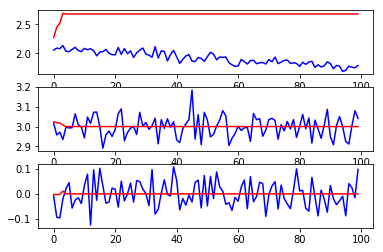

data3.npy
VARMAX(0, 1) mse: 6.45143169728
VARMAX(0, 2) mse: 6.39967842379
VARMAX(0, 3) mse: 6.40150182664
VARMAX(0, 4) mse: 6.29231321957
VARMAX(1, 0) mse: 0.0275267741211
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(1, 4) mse: 0.184088166302
VARMAX(2, 0) mse: 0.0138896865661
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
error (2, 4)
VARMAX(3, 0) mse: 0.0126948692383
error (3, 1)
error (3, 2)
VARMAX(3, 3) mse: 3.3891726119e+11
error (3, 4)
VARMAX(4, 0) mse: 0.011904256961
VARMAX(4, 1) mse: 0.0140381029404
error (4, 2)
error (4, 3)
error (4, 4)
best params: (4, 0)


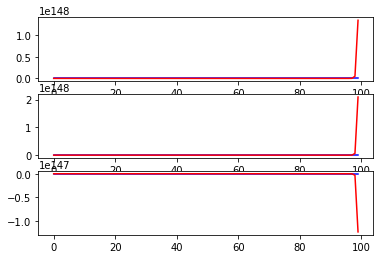

data4.npy
VARMAX(0, 1) mse: 8.47325453162
VARMAX(0, 2) mse: 8.47561798842
VARMAX(0, 3) mse: 8.48292772724
VARMAX(0, 4) mse: 8.46040372072
VARMAX(1, 0) mse: 0.180033432151
error (1, 1)
VARMAX(1, 2) mse: inf
VARMAX(1, 3) mse: 5.75158227808e+275
VARMAX(1, 4) mse: 1.32944319338e+94
VARMAX(2, 0) mse: 0.0121308242706
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
error (2, 4)
VARMAX(3, 0) mse: 0.0108918565394
VARMAX(3, 1) mse: nan
VARMAX(3, 2) mse: 0.0107707023596
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 0.0130697311746
VARMAX(4, 1) mse: 0.0121547591122
VARMAX(4, 2) mse: 0.0151640797425
error (4, 3)
error (4, 4)
best params: (3, 2)


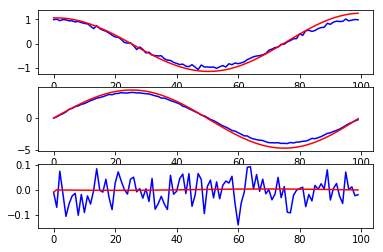

data5.npy
VARMAX(0, 1) mse: 1.01265139519
VARMAX(0, 2) mse: 1.01330207989
VARMAX(0, 3) mse: 1.01331781648
VARMAX(0, 4) mse: 1.01373119055
VARMAX(1, 0) mse: 1.03896677169
VARMAX(1, 1) mse: 1.03719056054
VARMAX(1, 2) mse: 1.01148141392
VARMAX(1, 3) mse: 0.997468356087
VARMAX(1, 4) mse: 0.992189096962
VARMAX(2, 0) mse: 1.03257609748
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: 0.983943095165
VARMAX(2, 4) mse: 0.957563327294
VARMAX(3, 0) mse: 0.950971851084
VARMAX(3, 1) mse: 0.942709422475
error (3, 2)
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 0.702555017478
error (4, 1)
error (4, 2)
error (4, 3)
error (4, 4)
best params: (4, 0)


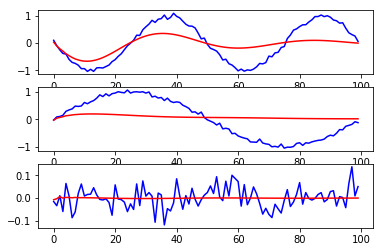

data6.npy
VARMAX(0, 1) mse: 2.5198200553
VARMAX(0, 2) mse: 2.52026033727
VARMAX(0, 3) mse: 2.52108308345
VARMAX(0, 4) mse: 2.52275486591
VARMAX(1, 0) mse: 2.64015308284
VARMAX(1, 1) mse: 2.61839394048
VARMAX(1, 2) mse: 2.63953694463
VARMAX(1, 3) mse: 2.55356461203
VARMAX(1, 4) mse: 2.53009233353
VARMAX(2, 0) mse: 2.43154870897
error (2, 1)
error (2, 2)
error (2, 3)
error (2, 4)
VARMAX(3, 0) mse: 2.03677505796e+105
VARMAX(3, 1) mse: 0.501412236883
VARMAX(3, 2) mse: 5.1447689233e+89
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 2.02972783498e+44
error (4, 1)
VARMAX(4, 2) mse: 0.815177304459
error (4, 3)
VARMAX(4, 4) mse: 0.765901433884
best params: (3, 1)


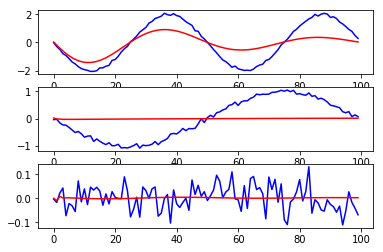

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 5), range(0, 5)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    [results,params,mse] = fit_modelsVARMAX(data,horizon=horizon,t_train=t_train,pds=pds)
    print 'best params: {}'.format(params)
    tmpdata = data[t_train:t_train+horizon]
    preds = results.forecast(100)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(preds[:,i],color='r')
    plt.show()

# Prophet

In [10]:
from fbprophet import Prophet

# data as demonstrator

In [ ]:
#https://github.com/arunvenk/DaD